# R/Jobs Data Exploration

This notebook contains my data exploration for the subreddit [r/Jobs](https://www.reddit.com/r/jobs/), a popular job search help forum on Reddit. 

I want to see if I can find any change in patterns after March 2020. What kind of posts trended after the start of Coronavirus pandemic lockdown in the US?

### Preliminary Questions:

1. What is the average number of comments (posts with a higher amount of comments have more user engagement). Median number of commnets? Median score?
2. Are most posts (ranked top 1000 of all time) created before or after March 2020?
3. What is the post with the highest number of comments? (most engagement)?
4. if we subset the data frame by month, what is the top comment for each month? what is its score? which is the one with the highest amount of user engagement?
5. 



In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('../data/raw/posts_jobs.csv')
# that's how you do it:) (navigating up i mean)


df.shape
df.columns
df.head()

,Unnamed: 0,title,score,id,subreddit,url,num_comments,body,created,date_created
0,0,So real talk. Why are so may $30k to $40k per ...,12259,9u3fww,jobs,https://www.reddit.com/r/jobs/comments/9u3fww/...,3975,It just seems odd that when I go on job boards...,1.541368e+09,2018-11-04 16:48:13
1,1,I'm an ex-recruiter for some of the top compan...,7259,7y8k6p,jobs,https://www.reddit.com/r/jobs/comments/7y8k6p/...,688,"**April 5, 2020 edit:** I've been getting more...",1.518923e+09,2018-02-17 21:57:42
2,2,A Warning About Glassdoor,5697,jbod57,jobs,https://www.reddit.com/r/jobs/comments/jbod57/...,470,**EDIT**: A little info from Glassdoor that I ...,1.602800e+09,2020-10-15 18:16:35
3,3,"America is not lacking in skilled employees, A...",4110,jo6lc7,jobs,https://www.reddit.com/r/jobs/comments/jo6lc7/...,475,If every entry level job requires a year exper...,1.604558e+09,2020-11-05 01:35:38
4,4,UPDATE 3: I have slipped through the cracks at...,3571,3jjs1n,jobs,https://www.reddit.com/r/jobs/comments/3jjs1n/...,1263,Link to my original post: https://www.reddit.c...,1.441350e+09,2015-09-04 03:03:16


In [4]:
# let's rename these columns

df = df.rename(columns={'Unnamed: 0':'index'})

df.columns



Index(['index', 'title', 'score', 'id', 'subreddit', 'url', 'num_comments',
       'body', 'created', 'date_created'],
      dtype='object')

After some analysis, we find this data fram has :

- 1000 observations by 9 variables (10 if you count the pandas dataframe index).
- These variables are:
    - Post Title
    - Post Score in Upvotes / Downvotes
    - Post ID 
    - Subreddit Name 
    - Direct Url Link to Post 
    - Created in seconds (Computer Time)
    - Date Created (obtained from Computer Time)

### Next Steps 
I now want to

- [x] Find the median post score. 
- [x] Find the median number of comments 
- [x] Find the average number of comments 
- [x] Create month index column
- [ ] Subset data frame by month
- [ ] Find the most commented post from each month.
- [ ] Find the most upvoted post from each month. Compare to most commented. 
- [ ] The highest commented AND highest upvoted post of all time
- [ ] 


### Why do I want these Statistics?

1. The median of a sample is less susepctible to outliers than the mean is, so it is better to use as something to compare scores with, but I also still want to see that mean!
2. I wannt to see how the top post by month changed during the progression of the Coronavirus Lockdown Period. 
3. More posts implies a higher level of user engagement, even if it is a very rough measurement of engagement. I wasnt to see which posts were most engaging. 
4. However, more upvotes implies more people "agree" with the sentiment the poster has. 
    



In [5]:
# median of entire data frame
# there are no missing values here

df.describe()


# I see why they use millisecond time, to make it easier to parse, hahaha. 
# to get the dates i will have to get creative and make a new column for month it was posted in. maybe date_created.contains??


# Average score: 554.327000 points. 
# Average number of comments : 132.909000
# Average post_date (whatever that means right now): Tuesday, March 26, 2019 10:26:40 AM EST (also known as 1.553596e+09) in epoch time. interesting...... the average is after the arrival of COVID 19 to America

,index,score,num_comments,created
count,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,499.500000,554.327000,132.909000,1.553596e+09
std,288.819436,584.268464,179.286476,5.541605e+07
min,0.000000,253.000000,1.000000,1.311579e+09
25%,249.750000,317.500000,66.000000,1.538492e+09
50%,499.500000,407.500000,100.000000,1.565390e+09
75%,749.250000,615.250000,155.500000,1.594598e+09
max,999.000000,12259.000000,3975.000000,1.608679e+09


In [6]:
# get some medians now

print(df['score'].median())
print(df['num_comments'].median())
print(df['created'].median())


# Median Report:
# median Score: 407.5
# median number of comments - 100.0
# Median date created/ posted: Friday, August 9, 2019 10:41:01.500 PM (a bit higher than the average date, does this mean top posts skew to before the pandemic?)
# interestingly. for this subreddit, we have the media (less susceptible to outlier) posts coming from almost a year before, august 2019!!! vs the career guidance one. this could be from subreddit creation but also interesting 

407.5
100.0
1565390461.5


In [7]:
# Now we subset by month by creating a new column called...."month", haha. 

df['month'] = df['date_created'] # initialize

df.columns[0]
df.columns[0] # this only returns a string haha

type(df['date_created'][2])
iter = 0

for x in df['date_created']:
    #print(iter)
    #print(df['date_created'][iter])

    # actual logic here
    if '2020-03' in x:
        #print(df['month'][iter]) #check
        df['month'][iter] = 'March'
        #print(df['month'][iter])
    if '2020-04' in x:
        #print(df['month'][iter]) #check
        df['month'][iter] = 'April'
        #print(df['month'][iter])
    if '2020-05' in x:
        #print(df['month'][iter]) #check
        df['month'][iter] = 'May'
        #print(df['month'][iter])
    if '2020-06' in x:
        #print(df['month'][iter]) #check
        df['month'][iter] = 'June'
        #print(df['month'][iter])
    if '2020-07' in x:
        #print(df['month'][iter]) #check
        df['month'][iter] = 'July'
        #print(df['month'][iter])
    if '2020-08' in x:
        #print(df['month'][iter]) #check
        df['month'][iter] = 'August'
        #print(df['month'][iter])
    if '2020-09' in x:
        #print(df['month'][iter]) #check
        df['month'][iter] = 'September'
        #print(df['month'][iter])
    if '2020-10' in x:
        #print(df['month'][iter]) #check
        df['month'][iter] = 'October'
        #print(df['month'][iter])
    if '2020-11' in x:
        #print(df['month'][iter]) #check
        df['month'][iter] = 'November'
        #print(df['month'][iter])
    if '2020-12' in x:
        #print(df['month'][iter]) #check
        df['month'][iter] = 'December'
        #print(df['month'][iter])
    iter+=1


df.head()



,index,title,score,id,subreddit,url,num_comments,body,created,date_created,month
0,0,So real talk. Why are so may $30k to $40k per ...,12259,9u3fww,jobs,https://www.reddit.com/r/jobs/comments/9u3fww/...,3975,It just seems odd that when I go on job boards...,1.541368e+09,2018-11-04 16:48:13,2018-11-04 16:48:13
1,1,I'm an ex-recruiter for some of the top compan...,7259,7y8k6p,jobs,https://www.reddit.com/r/jobs/comments/7y8k6p/...,688,"**April 5, 2020 edit:** I've been getting more...",1.518923e+09,2018-02-17 21:57:42,2018-02-17 21:57:42
2,2,A Warning About Glassdoor,5697,jbod57,jobs,https://www.reddit.com/r/jobs/comments/jbod57/...,470,**EDIT**: A little info from Glassdoor that I ...,1.602800e+09,2020-10-15 18:16:35,October
3,3,"America is not lacking in skilled employees, A...",4110,jo6lc7,jobs,https://www.reddit.com/r/jobs/comments/jo6lc7/...,475,If every entry level job requires a year exper...,1.604558e+09,2020-11-05 01:35:38,November
4,4,UPDATE 3: I have slipped through the cracks at...,3571,3jjs1n,jobs,https://www.reddit.com/r/jobs/comments/3jjs1n/...,1263,Link to my original post: https://www.reddit.c...,1.441350e+09,2015-09-04 03:03:16,2015-09-04 03:03:16


In [8]:
 # was testing out logic here
 #print('2020-05' in df['date_created'][2])

 #print(df['date_created'][2])

## March Analysis for r/Jobs

| Statistic   | March Posts | --Top 1000 Form Posts of All Time--
| ----------- | ----------- | ----------- |
| Number of Posts  | 17       | 1000 |
| Average Post Score | 431.058824 | 554.327000 | 
| Average Number of Comments|  111.352941* | 132.909000|
| Highest Number of Comments on Post | 272.000000  | 3975.000000	|
| Highest Post Score | 1262.000000  | 12259.000000 |


In comparison to the top 1000 posts of all time on CareerGuidance, March had a higher average number of comments. To me, this implies a higher level of user engagement. 

#### Most interesting post from March Posts: 
[highest num comments](https://www.reddit.com/r/jobs/comments/fibuqr/what_do_people_do_in_office_jobs/)

[highest score](https://www.reddit.com/r/jobs/comments/fkmlot/there_should_be_some_kind_of_regulation_where_job/)

In [9]:

is_march = df['month']=='March'

march_df = df[is_march]
march_df.head()

#print(march_df.shape)

# top comment from march now

#print(march_df.describe())


# get some medians now

# median score for march
#print(march_df['score'].median())

#  median number of comments for march
#print(march_df['num_comments'].median())
#march_df[march_df['num_comments']==march_df['num_comments'].max()].head()

#march_df[march_df['num_comments']==march_df['score'].max()]['date_created']     

march_df[march_df['score']==march_df['score'].max()]['date_created'] 
march_df[march_df['score']==march_df['score'].max()].head()


,index,title,score,id,subreddit,url,num_comments,body,created,date_created,month
43,43,There should be some kind of regulation where ...,1262,fkmlot,jobs,https://www.reddit.com/r/jobs/comments/fkmlot/...,147,Really annoying how a ton of jobs never have t...,1.584551e+09,2020-03-18 13:04:54,March


## April Analysis for r/Jobs

| Statistic   | March Posts | --Top 1000 Form Posts of All Time--
| ----------- | ----------- | ----------- |
| Number of Posts  | 0       | 0 |
| Average Post Score | 0.0 | 0.0 | 
| Average Number of Comments|0 | 0
| Highest Number of Comments on Post | 0  | 0 |
| Highest Post Score | 0 | 0 |

### interesting post from April:

[highest num of comments](https://www.reddit.com/r/jobs/comments/g8b9fr/what_are_some_niche_jobs_that_while_not_that/)

[highest score](https://www.reddit.com/r/jobs/comments/g6wil1/why_do_nearly_all_entrylevel_jobs_require/)




In [10]:
is_april = df['month']=='April'

april_df = df[is_april]
april_df.head()

print(april_df.shape)

# top comment from march now

print(april_df.describe())




april_df[april_df['num_comments']==april_df['score'].max()]['date_created'] 


april_df[april_df['score']==april_df['score'].max()]['date_created'] 
april_df[april_df['score']==april_df['score'].max()].head()


april_df[april_df['num_comments']==april_df['num_comments'].max()].head()


(20, 11)
            index       score  num_comments       created
count   20.000000   20.000000     20.000000  2.000000e+01
mean   681.900000  359.050000    124.650000  1.587089e+09
std    222.775294  109.097482     63.578609  7.341073e+05
min    174.000000  256.000000     26.000000  1.585888e+09
25%    545.500000  286.250000     82.750000  1.586606e+09
50%    683.500000  343.000000    112.500000  1.587080e+09
75%    865.750000  393.000000    148.250000  1.587727e+09
max    987.000000  728.000000    301.000000  1.588225e+09


,index,title,score,id,subreddit,url,num_comments,body,created,date_created,month
683,683,What are some niche jobs that while not that w...,344,g8b9fr,jobs,https://www.reddit.com/r/jobs/comments/g8b9fr/...,301,Pretty straight forward. I have heard a few pe...,1.587921e+09,2020-04-26 13:07:12,April


# May Analysis

1. [top comments]()
2. [top score](https://www.reddit.com/r/jobs/comments/ggagbp/does_anyone_else_find_linkedin_toxic/)



In [11]:
is_may = df['month']=='May'

may_df = df[is_may]
may_df.head()

print(may_df.shape)

# top comment from march now

print(may_df.describe())




may_df[may_df['num_comments']==may_df['score'].max()]['date_created'] 


may_df[may_df['score']==may_df['score'].max()]['date_created'] 
may_df[may_df['score']==may_df['score'].max()].head()


#may_df[may_df['num_comments']==may_df['num_comments'].max()].head()

may_df.to_csv('jobs_may.csv')

(22, 11)
            index        score  num_comments       created
count   22.000000    22.000000     22.000000  2.200000e+01
mean   436.090909   535.409091    156.136364  1.589890e+09
std    240.338632   279.077845     81.801907  6.740305e+05
min     26.000000   270.000000     50.000000  1.588728e+09
25%    266.750000   388.000000    103.250000  1.589449e+09
50%    472.500000   424.000000    138.500000  1.589929e+09
75%    538.750000   595.250000    175.000000  1.590416e+09
max    922.000000  1505.000000    336.000000  1.590883e+09


In [12]:
is_july = df['month']=='June'

june_df = df[is_june]
may_df.head()

print(may_df.shape)

# top comment from march now

print(may_df.describe())




may_df[may_df['num_comments']==may_df['score'].max()]['date_created'] 


may_df[may_df['score']==may_df['score'].max()]['date_created'] 
may_df[may_df['score']==may_df['score'].max()].head()


#may_df[may_df['num_comments']==may_df['num_comments'].max()].head()

NameError: name 'is_june' is not defined

### What are the top 5 most upvoted post of all time, after the start of the Pandemic in the US?


In [ ]:

#df[df['month'] in {'March' | 'April' | 'May' |'June' |'July'|'August'| 'Septermber'|'October'| 'November'|'Deember'}]

is_covid = (df['month']!='March')or (df['month']=='March')or(df['month']=='April')or(df['month']=='May')or(df['month']=='June')or(df['month']=='July')or(df['month']=='August')or(df['month']=='September')or(df['month']=='October')or(df['month']=='December')

covid_df=df[is_covid]



covid_df[covid_df['score']==covid_df['score'].max()]['date_created'] 
covid_df[covid_df['score']==covid_df['score'].max()].head()


covid_df.head()


In [ ]:
#df[df['month'] in {'March' | 'April' | 'May' |'June' |'July'|'August'| 'Septermber'|'October'| 'November'|'Deember'}]

is_not_covid = df['date_created'] < '2020-03-01'

not_covid_df=df[is_not_covid]




not_covid_df[not_covid_df['score']==not_covid_df['score'].max()]['date_created'] 
not_covid_df[not_covid_df['score']==not_covid_df['score'].max()].head()


not_covid_df.head()

In [ ]:
#'2020-08'> '2020-07'

# trying out date truth values. 

In [ ]:
# example code for plot

labels = ['Top Post', '2nd Top Post', '3rd Top Post','','']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

#fig.tight_layout()

plt.show()

# What share of the top 1000 posts does 2020 take in r/jobs?

In [13]:
#count representation by year
ct_2020 = 0
ct_2019 = 0
ct_2018 = 0
ct_2017 = 0
ct_2016 = 0

for x in df['date_created']:
    if '2020' in x:
        ct_2020 += 1
    if '2019' in x:
        ct_2019 += 1
    if '2018' in x:
        ct_2018 += 1
    if '2017' in x:
        ct_2017 += 1
    if '2016' in x:
        ct_2016 += 1

print(ct_2020, ct_2019, ct_2018, ct_2017, ct_2016)

393 308 157 41 35


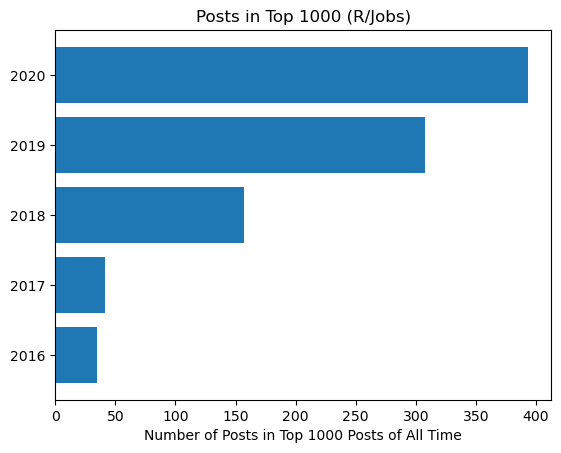

In [15]:
labels = ['2020', '2019', '2018','2017','2016']
import matplotlib.pyplot as plt
import numpy as np


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
years = ('2020', '2019', '2018','2017','2016')
y_pos = np.arange(len(years))
num_posts = [393 ,308,157,41,35]

ax.barh(y_pos, num_posts, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(years)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of Posts in Top 1000 Posts of All Time')
ax.set_title('Posts in Top 1000 (R/Jobs)')

plt.show()